In [1]:
!conda update jupyerlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
!pip install openpyxl
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\vusi\anaconda3
  package name: jupyerlab




Retrieving notices: ...working... done


C:\Users\vusi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
csv_path = 'SUM FEB.csv'
df = pd.read_csv(csv_path)

#df['standard'] = df['standard'].astype(int)
#df['target decimal']=df['target decimal'].astype(float)
df.head(10)

,Target,Current code,Position code,Prev position code,D,E,Position number,Temp pos,Prev pos,Temp,Class1,Class 2,Class 3
0,1,16,16,13,10,100,3,1,1,6,500,100,25
1,2,12,19,16,10,100,1,1,1,9,500,100,25
2,2,15,13,19,100,10,2,1,1,3,75,50,75
3,2,18,16,13,100,100,1,1,1,6,500,25,100
4,3,11,16,13,10,100,3,1,1,6,100,100,25
5,3,11,16,13,10,100,1,1,1,6,50,75,50
6,3,14,19,16,100,100,1,1,1,9,500,25,100
7,3,14,19,16,100,100,3,1,1,9,50,100,25
8,1,19,19,15,100,100,4,1,2,9,500,25,100
9,2,12,19,15,10,100,5,1,2,9,200,75,50


In [3]:
X_cols = [#'Current code',
          'Position code',
          'Prev position code',
          'D',
          'E',
          'Position number',
          'Temp pos',
          'Prev pos',
          'Temp',
          'Class1',
          'Class 2',
          'Class 3'
          ]
          

y_cols = 'Target'

X1 = df[X_cols]
y1 = df[y_cols]
print(X1.shape)
print(y1.shape)

(83, 11)
(83,)


In [4]:
y = df['Target'].to_numpy()
y

array([1, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1,
       2, 2, 2, 3, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 2, 2,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=int64)

In [5]:
X = df.drop(['Target'],axis=1)
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 0.53384221,  0.38742169, -0.64304368, -0.60125177,  0.83094965,
        -1.00531903, -1.22559333, -1.43716775,  0.        ,  1.29398551,
         1.21325341, -1.21325341],
       [-1.02085615,  1.52233933,  0.52569994, -0.60125177,  0.83094965,
        -1.80380209, -1.22559333, -1.43716775,  1.2174329 ,  1.29398551,
         1.21325341, -1.21325341],
       [ 0.14516762, -0.74749596,  1.69444357,  1.82650537, -1.27318387,
        -1.40456056, -1.22559333, -1.43716775, -1.2174329 , -0.86930069,
        -0.65156202,  0.65156202],
       [ 1.31119138,  0.38742169, -0.64304368,  1.82650537,  0.83094965,
        -1.80380209, -1.22559333, -1.43716775,  0.        ,  1.29398551,
        -1.58396973,  1.58396973],
       [-1.40953074,  0.38742169, -0.64304368, -0.60125177,  0.83094965,
        -1.00531903, -1.22559333, -1.43716775,  0.        , -0.74204856,
         1.21325341, -1.21325341],
       [-1.40953074,  0.38742169, -0.64304368, -0.60125177,  0.83094965,
        -1.80380209, -

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
y_test.shape

(25,)

In [69]:
parameters ={"C":[0.01],'penalty':["l2"], 'solver':['lbfgs'], 'multi_class':['multinomial']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

In [70]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_*100, "%")
y_predict = logreg_cv.best_params_

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 46.99999999999999 %


In [93]:
results = pd.DataFrame(logreg_cv.cv_results_)
print(results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.009613      0.005034         0.002988        0.004062    0.01   

  param_multi_class param_penalty param_solver  \
0       multinomial            l2        lbfgs   

                                              params  split0_test_score  ...  \
0  {'C': 0.01, 'multi_class': 'multinomial', 'pen...                0.5  ...   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0                0.5                0.5                0.5                0.5   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0                0.5                0.6                0.6             0.47   

   std_test_score  rank_test_score  
0        0.122429                1  

[1 rows x 22 columns]


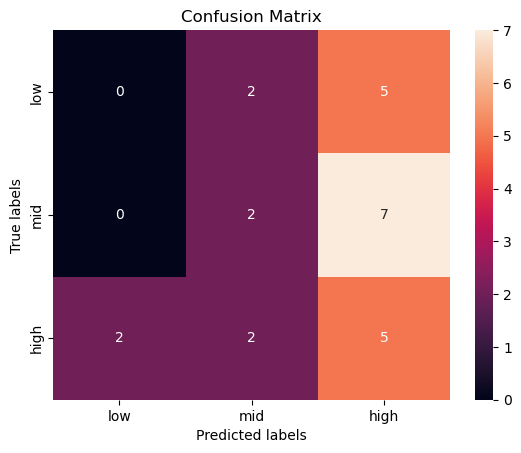

In [76]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['low','mid','high']); ax.yaxis.set_ticklabels(['low','mid','high']) 
    plt.show()
    
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [100]:
parameters = {'kernel':('linear', 'rbf','poly','rbf','sigmoid'),
              'C': np.logspace(-3, 3, 13),
              'gamma':np.logspace(-3, 3, 5)}
svm1 = SVC()

In [101]:
svm_cv = GridSearchCV(svm1, parameters, cv= 10)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [102]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_*100, "%")

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'gamma': 1000.0, 'kernel': 'sigmoid'}
accuracy : 57.00000000000001 %


In [89]:
results = pd.DataFrame(svm_cv.cv_results_)
print(results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.003861      0.002556         0.001610        0.000605   0.001   
1       0.002237      0.002004         0.002674        0.005400   0.001   
2       0.001562      0.004685         0.001563        0.004688   0.001   
3       0.001562      0.004686         0.001562        0.004685   0.001   
4       0.000000      0.000000         0.003124        0.006249   0.001   

  param_gamma param_kernel                                             params  \
0       0.001          rbf      {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
1       0.001         poly     {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}   
2       0.001          rbf      {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
3       0.001      sigmoid  {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'}   
4    0.031623          rbf  {'C': 0.001, 'gamma': 0.03162277660168379, 'ke...   

   split0_test_score  split1_test_score  ...  split3_test_scor

In [44]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': range(1, 10, 1),
     'min_samples_leaf': range(1, 20, 2),
     'min_samples_split': range(2, 20, 2),}

     #'max_depth': [2*n for n in range(1,10)],
     #'max_features': ['auto', 'sqrt'],
     #'min_samples_leaf': [1, 2, 4],
     #'min_samples_split': [2, 5, 10]}

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

tree = DecisionTreeClassifier()


In [45]:
tree_cv = GridSearchCV(tree, parameters, cv= 5, verbose=True)
tree_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']},
             verbose=True)

In [46]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_*100, "%")


tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 98.33333333333331 %


In [92]:
results = pd.DataFrame(tree_cv.cv_results_)
print(results.tail(10))

      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3230       0.003124      0.006247         0.000000        0.000000   
3231       0.000000      0.000000         0.003124        0.006249   
3232       0.000000      0.000000         0.003124        0.006248   
3233       0.003124      0.006248         0.000000        0.000000   
3234       0.000000      0.000000         0.003125        0.006250   
3235       0.003123      0.006247         0.003124        0.006247   
3236       0.000000      0.000000         0.000000        0.000000   
3237       0.003125      0.006249         0.003124        0.006248   
3238       0.000000      0.000000         0.000000        0.000000   
3239       0.003124      0.006248         0.000000        0.000000   

     param_criterion param_max_depth param_min_samples_leaf  \
3230         entropy               9                     19   
3231         entropy               9                     19   
3232         entropy               9    

In [79]:
parameters = {'n_neighbors': [5],
              'algorithm': ['auto'],
              'p': [1]}

KNN = KNeighborsClassifier()

In [80]:
knn_cv = GridSearchCV(KNN, parameters, cv =10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [5], 'p': [1]})

In [81]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_*100, "%")

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 59.0 %


In [103]:
results = pd.DataFrame(knn_cv.cv_results_)
print(results.tail(10))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.01187      0.035611         0.009366        0.010349   

  param_algorithm param_n_neighbors param_p  \
0            auto                 5       1   

                                            params  split0_test_score  \
0  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}                0.5   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0                0.5  ...           0.666667           0.333333   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.666667           0.666667           0.666667                0.8   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0                0.6             0.59        0.125654                1  

[1 rows x 21 columns]
